<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA Projesi 
- Movies</b></p>

<b>İçindekiler:</b>
<ul>
<li><a href="#import-library">Kütüphanelerin Yüklenmesi</a></li>
<li><a href="#loading-dataset">Veri Setinin Yüklenmesi</a></li>
<li><a href="#understanding-dataset">Veri Setini Anlama</a></li>
<li><a href="#organizing-columns">Sütunları Düzenleme</a></li>
<li><a href="#nan-values">NaN Değerler</a></li>
<li><a href="#data-visualization">Veri Görselleştirme</a></li>
</ul>

<a id='import-library'></a>
# <font color='firebrick'> <b>Kütüphanelerin Yüklenmesi</b><font color='black'> 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

<a id='loading-dataset'></a>
# <font color='firebrick'> <b>Veri Setinin Yüklenmesi</b><font color='black'> 

In [6]:
df0 = pd.read_csv("movies.csv")
df = df0.copy()

In [7]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\r\nAction, Horror, Thriller",6.1,\r\nA woman with a mysterious illness is force...,\r\n Director:\r\nPeter Thorwarth\r\n| \r\n...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\r\nAnimation, Action, Adventure",5.0,\r\nThe war for Eternia begins again in what m...,"\r\n \r\n Stars:\r\nChris Wood, ...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\r\nDrama, Horror, Thriller",8.2,\r\nSheriff Deputy Rick Grimes wakes up from a...,\r\n \r\n Stars:\r\nAndrew Linco...,"885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\r\nAnimation, Adventure, Comedy",9.2,\r\nAn animated series that follows the exploi...,\r\n \r\n Stars:\r\nJustin Roila...,"414,849",23.0,NaN
4,Army of Thieves,(2021),"\r\nAction, Crime, Horror",NaN,"\r\nA prequel, set before the events of Army o...",\r\n Director:\r\nMatthias Schweighöfer\r\n...,NaN,NaN,NaN


In [8]:
df.sample(5)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
2813,Hating Peter Tatchell,(2021),\r\nDocumentary,7.9,\r\nThe profound life story of the controversi...,\r\n Director:\r\nChristopher Amos\r\n| \r\...,396,91.0,NaN
5252,Lava Ka Dhaava,(2021– ),"\r\nGame-Show, Reality-TV",6.1,\r\nActor Jaaved Jaafferi brings his signature...,\r\n \r\n Star:\r\nJaved Jaffrey...,39,29.0,NaN
1310,Rita,(2012–2020),"\r\nComedy, Drama",8.1,\r\nFollowing the life of a very outspoken and...,\r\n \r\n Stars:\r\nMille Dinese...,"8,057",40.0,NaN
1527,Wednesday,(II),"\r\nComedy, Family, Fantasy",NaN,\r\nA modernized live-action version of 'The A...,\r\n \r\n Star:\r\nJenna Ortega\r\n,NaN,NaN,NaN
5722,Like Cotton Twines,(2016),\r\nDrama,7.7,\r\nAn American volunteer teaching in a school...,\r\n Director:\r\nLeila Djansi\r\n| \r\n ...,64,96.0,NaN


<a id='understanding-dataset'></a>
# <font color='firebrick'> <b>Veri Setini Anlama</b><font color='black'> 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RATING,8179.0,6.921176,1.220232,1.1,6.2,7.1,7.8,9.9
RunTime,7041.0,68.688539,47.258056,1.0,36.0,60.0,95.0,853.0


In [12]:
df.describe(include= "object").T

,count,unique,top,freq
MOVIES,9999,6817,Bleach: Burîchi,65
YEAR,9355,438,(2020– ),892
GENRE,9919,510,\r\nComedy,852
ONE-LINE,9999,8688,\r\nAdd a Plot\r\n,1265
STARS,9999,7877,\r\n,456
VOTES,8179,4129,7,35
Gross,460,332,$0.01M,22


In [13]:
df.duplicated().sum()

431

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.isnull().sum()

MOVIES         0
YEAR         542
GENRE         78
RATING      1400
ONE-LINE       0
STARS          0
VOTES       1400
RunTime     2560
Gross       9108
dtype: int64

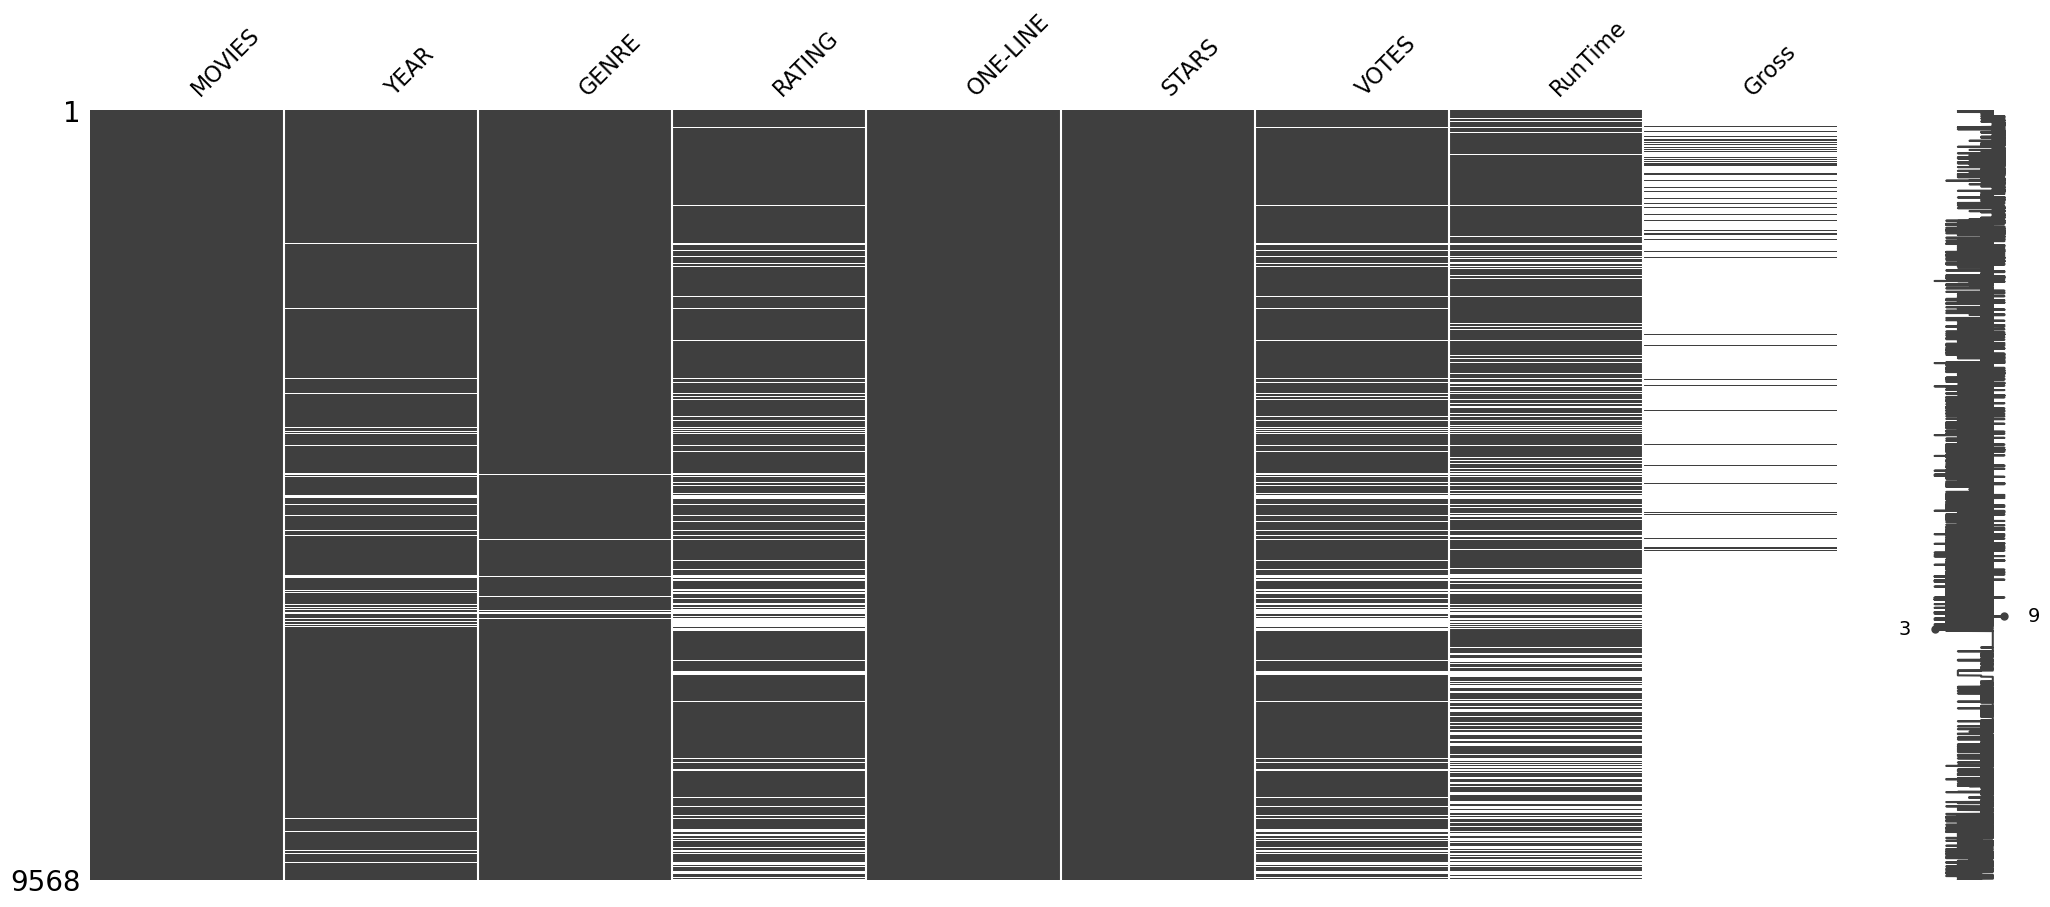

In [16]:
msno.matrix(df);

In [17]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9568   │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA     ┃ NA %     ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ RATING           │   1400 │    14.63 │     6.92 │    1.22 │   1.1 │   6.2 │   7.1 │  7.8 │   9.9 │   ▂▆▇▁  │  │
│ │ RunTime          │   2560 │    26.76 │    68.87 │   47.28 │     1 │    37 │    60 │   95 │   853 │    ▇    │  │
│ └──────────────────┴────────┴──────────┴──────────┴─────────┴───────┴───────┴───────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA         ┃ NA %         ┃ words per row              ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ MOVIES                   │          0 │            0 │                        3.3 │                  31493 │  │
│ │ YEAR                     │        542 │         5.66 │                        1.4 │                  13450 │  │
│ │ GENRE                    │         78 │         0.82 │                         14 │                 135144 │  │
│ │ ONE-LINE                 │          0 │            0 │                         25 │                 242532 │  │
│ │ STARS                    │          0 │            0 │                         19 │                 182105 │  │
│ │ VOTES                    │       1400 │        14.63 │                       0.85 │                   8168 │  │
│ │ Gross                    │       9108 │        95.19 │                      0.048 │                    460 │  │
│ └──────────────────────────┴────────────┴──────────────┴────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<a id='organizing-columns'></a>
# <font color='firebrick'> <b>Sütunları Düzenleme</b><font color='black'> 

In [19]:
df.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross'],
      dtype='object')

In [20]:
df.columns = df.columns.str.lower().str.replace('-', '_')
df.columns

Index(['movies', 'year', 'genre', 'rating', 'one_line', 'stars', 'votes',
       'runtime', 'gross'],
      dtype='object')

In [21]:
# bu proje için one_line sütunu kullanılmayacak bu yüzden one_line sütununu silelim.
df.drop(columns=['one_line'], inplace= True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9568 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movies   9568 non-null   object 
 1   year     9026 non-null   object 
 2   genre    9490 non-null   object 
 3   rating   8168 non-null   float64
 4   stars    9568 non-null   object 
 5   votes    8168 non-null   object 
 6   runtime  7008 non-null   float64
 7   gross    460 non-null    object 
dtypes: float64(2), object(6)
memory usage: 672.8+ KB


## <font color='indianred'> <b>movies Sütunu</b><font color='black'> 

In [24]:
df["movies"] = df["movies"].str.strip()

## <font color='indianred'> <b>year Sütunu</b><font color='black'> 

In [26]:
df["year"] = df["year"].str.strip()

In [ ]:
df.year.unique()

Bu sütunda (), -, TV Special, TV Show ve Roma rakamları gibi bazı değerler bulunmaktadır. Bu değerleri temizleyelim.

In [29]:
df["year"] = df['year'].str.replace(r'[\(\)]', '', regex=True)

In [30]:
df["year"] = df['year'].str.replace('\u2013', '-', regex=False).str.split('-').str[0]

In [31]:
df['year'] = df['year'].replace(to_replace=r'\b(I|II|III|IV|V|VI|VII|VIII|IX|X|XI|XII|XIII|XXIII|XLI|XIV)\b', value='', regex=True)

In [32]:
df['year'] = df['year'].replace(to_replace=r'(TV Special|TV Movie|Video|TV Short|Game)', value='', regex=True).str.strip()

In [33]:
df['year'] = df['year'].replace("", np.nan)

In [34]:
df.year.unique()

array(['2021', '2010', '2013', '2020', '2006', '2019', '2016', '2011',
       '2005', '2008', '2017', '1994', '2014', '2015', '2003', '2009',
       '2018', '1987', '2012', '2007', '2000', '1993', '1999', '2001',
       '1997', '1989', '1975', '1995', '1984', '1998', '1966', '1990',
       '2002', '1976', '1978', '2022', '1982', '1968', '2004', '1996',
       '1971', '1980', '1962', '1991', '1960', '1988', '1969', '1961',
       '1979', '1956', '1983', nan, '1986', '1967', '1974', '1992',
       '1958', '1932', '1941', '1950', '1946', '1981', '1952', '1957',
       '1954', '1955', '1948', '1947', '1977', '2023', '1945', '1953',
       '1985', '1973', '1972', '1965', '1944', '1933', '1938'],
      dtype=object)

Bazı satırlarda **2010-2015** gibi değerler vardı. Bu değerleri - işaretine göre ayırıp ilk değeri almamızın nedeni bu sütunu **release_year**(yayınlanma tarihi) olarak ele almaktır. Bu sayede daha iyi bir görselleştirme elde edilebilir.

In [36]:
df = df.rename(columns={'year': 'release_year'})

## <font color='indianred'> <b>genre Column</b><font color='black'> 

In [ ]:
df.genre.unique()

In [39]:
df["genre"] = df["genre"].str.strip()

## <font color='indianred'> <b>rating Sütunu</b><font color='black'> 

In [41]:
df.rating.unique()

array([6.1, 5. , 8.2, 9.2, nan, 7.6, 6.8, 8.6, 7.9, 7.4, 6. , 8.1, 6.2,
       5.4, 8. , 7.5, 9.4, 8.3, 8.7, 8.9, 8.8, 8.5, 8.4, 6.7, 7.7, 9. ,
       5.8, 3.3, 7.8, 5.7, 6.6, 6.9, 6.5, 7.1, 5.6, 7.3, 9.1, 7.2, 6.4,
       9.3, 7. , 6.3, 3.7, 5.5, 4.6, 4.8, 5.3, 4.7, 5.9, 5.1, 4.9, 2.7,
       4.4, 3.1, 4.5, 4.2, 3.8, 5.2, 2.8, 3.5, 4.3, 3.2, 1.1, 3.9, 4. ,
       3.4, 2.6, 3.6, 3. , 2.5, 2.2, 2.9, 4.1, 2.1, 2. , 2.3, 2.4, 1.8,
       9.6, 9.5, 9.7, 9.9, 9.8])

**rating** sütunu şimdilik uygun görünüyor. Diğer sütunlarla devam edelim.

## <font color='indianred'> <b>stars Sütunu</b><font color='black'> 

In [44]:
df["stars"] = df["stars"].str.strip()

In [45]:
# \r, \n vb. gibi gereksiz değerlerin kaldırılması.
df['stars'] = df['stars'].str.replace('\r', '', regex=False).str.replace('\n', '', regex=False).str.replace('    ', '', regex=False)

In [46]:
df[['part1', 'part2']] = df['stars'].str.split('|', expand=True)

In [47]:
# 'Director:' ve 'Stars:' etiketlerini kaldırmak için sütunları temizleyelim
df['director'] = df['part1'].str.replace('Director:', '', regex=False)
df['actors'] = df['part2'].str.replace('Stars:', '', regex=False).str.strip()

In [48]:
# Director sütununda Stars: veya Star: ile başlayan değerler varsa,
# bu değeri Actors sütununa taşıyın ve Director sütununu boş bir string ile değiştirin
df.loc[df['director'].str.startswith(('Stars:', 'Star:')), 'actors'] = df['director'].str.replace('Stars:', '', regex=False).str.strip()
df.loc[df['director'].str.startswith('Stars:'), 'director'] = ''

In [49]:
df['actors'] = df['actors'].str.replace('Stars:', '', regex=False).str.replace('Star:', '', regex=False).str.strip()
df['director'] = df['director'].str.replace('Directors:', '', regex=False).str.strip()
df['director'] = df['director'].replace("", np.nan)

In [50]:
# Artık işimize yaramayacak sütunları silelim.
df = df.drop(columns=['stars', 'part1', 'part2'])

In [51]:
df.sample(5)

,movies,release_year,genre,rating,votes,runtime,gross,director,actors
1015,Dolemite Is My Name,2019,"Biography, Comedy, Drama",7.3,"56,613",118.0,NaN,Craig Brewer,"Eddie Murphy, Keegan-Michael Key, Mike Epps, C..."
4418,The Darkest Dawn,2016,"Action, Adventure, Sci-Fi",4.1,"2,072",76.0,NaN,Drew Casson,"Bethan Leadley, Cherry Wallis, Jess Cleverly, ..."
9269,Last Chance U: Basketball,2021,"Documentary, Sport",7.6,87,NaN,NaN,"Adam Leibowitz, Greg Whiteley",None
205,Taxi Driver,1976,"Crime, Drama",8.2,"752,553",114.0,$28.26M,Martin Scorsese,"Robert De Niro, Jodie Foster, Cybill Shepherd,..."
6496,Johnny Test,2005,"Animation, Action, Adventure",7.5,40,22.0,NaN,Chris Savino,"James Arnold Taylor, Louis Chirillo, Brittney ..."


## <font color='indianred'> <b>votes Sütunu</b><font color='black'> 

In [53]:
# Binlik ayracı olan (,) işaretini silelim.
df['votes'] = df['votes'].str.replace(',', '', regex=False)

In [54]:
# sütunun dtype'ının değiştirelim.
df['votes'] = df['votes'].astype(float)

Sütunun türü NaN değerleri içerdiğinden **int** olarak değiştirilemedi. NaN değerleri üzerinde işlemler yapıldıktan sonra dtype int'ye dönüştürülebilir.

## <font color='indianred'> <b>runtime Sütunu</b><font color='black'> 

In [57]:
df.runtime.unique()

array([121.,  25.,  44.,  23.,  nan,  50., 110.,  53.,  30., 114.,  42.,
       107.,  60.,  41.,  49.,  51., 109.,  22.,  43., 136.,  46.,  45.,
        58.,  24.,  70.,  64., 148., 395., 101.,  95.,  32., 118.,  47.,
        31., 104., 127.,  54.,  92.,  88.,  59.,  55., 178.,  16.,  48.,
        99., 124., 151., 100.,  40., 149., 119.,  20.,  87., 111.,  91.,
       117., 135., 129., 113.,  15.,  85., 169.,  97., 116., 138., 137.,
       209., 201., 123.,  96., 572., 467., 140.,  56., 112., 125., 145.,
       128., 147.,  90.,  98.,  26., 115., 156., 179., 108.,  34.,  11.,
       152.,  94., 133., 298.,  28., 126., 102., 106., 385., 122., 452.,
       120., 494., 240., 134.,  80.,  89.,  35., 216., 296., 143., 164.,
       386., 363., 150., 105., 131.,  65., 103.,  86.,  52., 356., 154.,
       130., 491., 132.,  93.,  82., 370.,  18., 228.,  84., 280.,  78.,
       316., 264.,  83.,  81., 270., 197., 347., 267.,  37., 230., 233.,
        21., 220., 331.,  39.,   9., 281.,  10., 55

**runtime** sütunu şimdilik için uygun görünüyor.

## <font color='indianred'> <b>gross Sütunu</b><font color='black'> 

In [ ]:
df.gross.unique()

In [61]:
# $ ve M işaretlerinin temizlenmesi
df["gross"] = df["gross"].str.replace('$', '').str.replace('M', '')

In [62]:
df["gross"] = df["gross"].astype(float)

<a id='nan-values'></a>
# <font color='firebrick'> <b>NaN Değerler</b><font color='black'> 

In [64]:
df.isnull().sum()

movies             0
release_year     635
genre             78
rating          1400
votes           1400
runtime         2560
gross           9108
director        3264
actors           632
dtype: int64

## <font color='indianred'> <b>"release_year" Sütunundaki NaN Değerler</b><font color='black'> 

**"release_year"** Sütunu İçin NaN Değerleri Doldurma Yöntemleri:
 - **Mode:** release_year sütunundaki NaN değerlerini mode ile doldurmak mantıklı olabilir çünkü yıl bilgileri genellikle belirli bir aralıkta sıklıkla tekrarlanan yıllara sahip olabilir. Bu, veri kümenizde en sık geçen yılın veri kümenizin geri kalanıyla daha iyi hizalanmasını sağlar.
 - **Mean:** Yıl bilgileri sürekli veri olduğundan ortalamanın kullanılması da mümkündür. Ancak yılların ortalaması çoğu zaman tam bir yıl değildir ve bazı yıllar için bu anlamlı olmayabilir.ir.

In [67]:
df.release_year.isnull().sum()

635

In [68]:
df.release_year.mode()[0]

'2020'

In [69]:
df["release_year"].fillna(df.release_year.mode()[0], inplace= True)

In [70]:
df.release_year.isnull().sum()

0

## <font color='indianred'> <b>"genre" Sütunundaki NaN Değerler</b><font color='black'> 

"genre" sütunundaki NaN değerleri ilk 10 türle rastgele doldurulabilir.

In [73]:
top10_genres = df["genre"].str.split(", ", expand=True).stack().value_counts()[:10]
top10_genres

Drama          4115
Comedy         2736
Action         2110
Adventure      1588
Animation      1584
Crime          1519
Documentary    1221
Thriller        895
Mystery         840
Romance         835
Name: count, dtype: int64

In [74]:
top10_genre_list = top10_genres.index.tolist()
top10_genre_list

['Drama',
 'Comedy',
 'Action',
 'Adventure',
 'Animation',
 'Crime',
 'Documentary',
 'Thriller',
 'Mystery',
 'Romance']

In [75]:
# NaN değerleri rastgele doldurma işlemi
df['genre'] = df['genre'].apply(lambda x: ', '.join(np.random.choice(top10_genre_list, size=1)) if pd.isna(x) else x)

In [76]:
df.genre.isnull().sum()

0

In [77]:
df["genre"].str.split(", ", expand=True).stack().value_counts()

Drama          4120
Comedy         2742
Action         2116
Adventure      1594
Animation      1593
Crime          1529
Documentary    1226
Thriller        903
Romance         850
Mystery         848
Fantasy         537
Horror          518
Family          442
Reality-TV      370
History         346
Biography       311
Sci-Fi          303
Short           247
Music           200
Sport           192
Game-Show        98
Talk-Show        89
Musical          61
War              48
Western          24
News             23
Film-Noir        12
Name: count, dtype: int64

Doldurma işlemi **en iyi 10 tür kullanılarak rastgele** yapıldığından, toplam değer sayısında aşırı bir değişiklik olmadı.

## <font color='indianred'> <b>"rating" Sütunundaki NaN Değerler</b><font color='black'> 

In [80]:
df.rating.mode()[0]

7.2

In [81]:
df["rating"] = df["rating"].fillna(df.rating.mode()[0])

In [82]:
df.rating.isnull().sum()

0

## <font color='indianred'> <b>"votes" Sütunundaki NaN Değerler</b><font color='black'> 

**"votes"** Sütununu Doldurma Yöntemleri:
 - **Mean:** Oy sütunundaki NaN değerlerini ortalamayla doldurmak genellikle daha mantıklıdır çünkü sayısal verilerde ortalama, verilerin merkezi eğilimini yansıtmada etkili bir yöntemdir.
 - **Mode:** En sık kullanılan değerle doldurma da düşünülebilir, ancak bu yöntem oylama gibi sürekli veriler için çok yaygın değildir çünkü veriler genellikle mode yerine ortalama etrafında yoğunlaşır.r.

In [85]:
df.votes.isnull().sum()

1400

In [86]:
# Oy sayısı ondalık sayı olmayacağından round kullanılarak mean değerini tam sayıya çevirelim
df.votes.mean().round(0)

15144.0

In [87]:
df["votes"].fillna(df.votes.mean().round(0), inplace= True)

In [88]:
df.votes.isnull().sum()

0

## <font color='indianred'> <b>"runtime" Sütunundaki NaN Değerler</b><font color='black'> 

In [90]:
df.runtime.mean().round(2)

68.87

In [91]:
mean_runtime_by_genre = df.groupby('genre')['runtime'].transform('mean')

In [92]:
df['runtime'].fillna(mean_runtime_by_genre, inplace= True)

In [93]:
df.runtime.isnull().sum()

38

In [94]:
df['runtime'].fillna(df.runtime.mean().round(2), inplace= True)

In [95]:
df.runtime.isnull().sum()

0

## <font color='indianred'> <b>"gross" Sütunundaki NaN Değerler</b><font color='black'> 

In [97]:
df.gross.isnull().sum()

9108

In [98]:
df.gross.isnull().sum() / len(df) * 100

95.1923076923077

**"gross" sütunun %95'i NaN değerlerinden oluşmaktadır.**

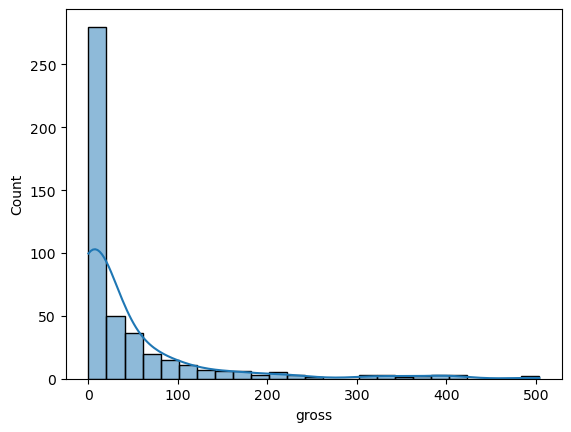

In [100]:
sns.histplot(df.gross, bins= 25, kde= True);

Sağa çarpık (right-skewed) dağılıma sahip bir sütun genellikle çoğu değerin düşük olduğunu ancak birkaç yüksek değerin bulunduğunu göstermektedir.

**Ortanca (Medyan)**, **sağa çarpık dağılımlarda** merkezi eğilimin **ortalamadan** daha güvenilir bir ölçüsüdür. Medyan aykırı değerlerden etkilenmez ve genellikle daha temsili bir değer sağlar.r.

In [171]:
df.gross.median()

6.145

In [173]:
df.gross.fillna(df.gross.median(), inplace=True)

In [175]:
df.gross.isnull().sum()

0

## <font color='indianred'> <b>"director" ve "actors" Sütunlarındaki NaN Değerler</b><font color='black'> 

In [106]:
df["director"].fillna("Unknown", inplace= True)

In [107]:
df["actors"].fillna("Unknown", inplace= True)

In [108]:
df.isnull().sum()

movies          0
release_year    0
genre           0
rating          0
votes           0
runtime         0
gross           0
director        0
actors          0
dtype: int64

In [109]:
df.sample(5)

,movies,release_year,genre,rating,votes,runtime,gross,director,actors
7271,Teenage Bounty Hunters,2020,"Comedy, Crime, Drama",8.1,723.0,51.875000,0.01,Andrew DeYoung,"Maddie Phillips, Anjelica Bette Fellini, Kadee..."
362,The Trial of the Chicago 7,2020,"Drama, History, Thriller",7.8,153211.0,129.000000,0.01,Aaron Sorkin,"Eddie Redmayne, Alex Sharp, Sacha Baron Cohen,..."
3828,Swing State,2017,"Comedy, Music, Romance",4.0,339.0,95.000000,0.01,Jonathan Sheldon,"Alex Beh, Arthur L. Bernstein, Adam Falkoff, S..."
4647,Du jia ji yi,2019,"Drama, Romance",7.3,125.0,81.254658,0.01,Unknown,"Chao Zhang, Tingting Li, Zhang Zhang, Yuli Deng"
7113,Siempre Bruja,2019,"Drama, Fantasy",8.2,22.0,79.571429,0.01,Unknown,"Angely Gaviria, Óscar Casas, Sofía Araújo, Dyl..."


In [177]:
# bazı sütunların dtype'ını değiştirme
df["release_year"] = df["release_year"].astype(int)
df["votes"] = df["votes"].astype(int)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9568 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movies        9568 non-null   object 
 1   release_year  9568 non-null   int32  
 2   genre         9568 non-null   object 
 3   rating        9568 non-null   float64
 4   votes         9568 non-null   int32  
 5   runtime       9568 non-null   float64
 6   gross         9568 non-null   float64
 7   director      6304 non-null   object 
 8   actors        8936 non-null   object 
dtypes: float64(3), int32(2), object(4)
memory usage: 930.8+ KB


In [183]:
# Veri kümesinin son (düzenlenmiş) halini csv dosyası olarak kaydetme
# df.to_csv("movies_edited.csv", index= False)

<a id='data-visualization'></a>
# <font color='firebrick'> <b>Veri Görselleştirme</b><font color='black'> 

## <font color='indianred'> <b>Yıllara Göre Film Sayılarının Dağılımı</b><font color='black'> 

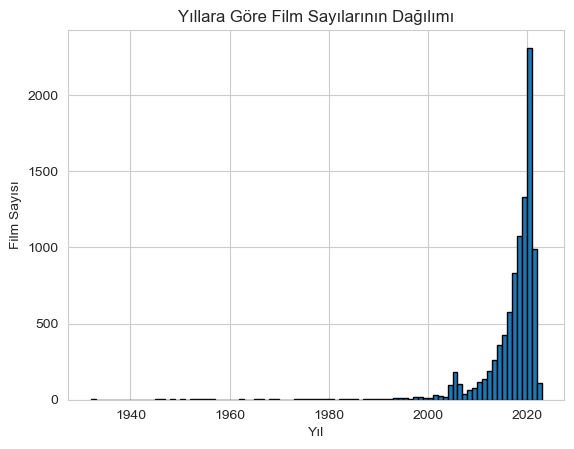

In [188]:
df['release_year'].plot(kind='hist', bins=range(df['release_year'].min(), df['release_year'].max() + 1), edgecolor='black')
plt.title('Yıllara Göre Film Sayılarının Dağılımı')
plt.xlabel('Yıl')
plt.ylabel('Film Sayısı')
plt.show()

Bu grafik 21. yüzyılda daha fazla filmin vizyona girdiğini gösteriyor.

## <font color='indianred'> <b>Film Türlerinin Dağılımı</b><font color='black'> 

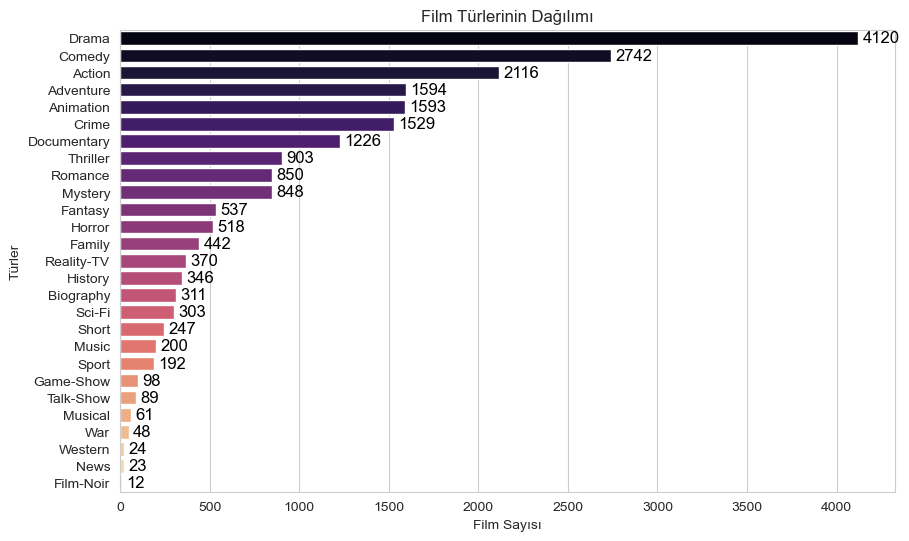

In [190]:
genre_counts = df['genre'].str.split(', ', expand=True).stack().value_counts()

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="magma")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3)
    
ax.set(xlabel='Film Sayısı', ylabel='Türler')
plt.title("Film Türlerinin Dağılımı")
plt.show()

In [192]:
genre_counts = df['genre'].str.split(', ', expand=True).stack().value_counts()
genre_ratio = genre_counts / len(df) * 100
genre_ratio

Drama          43.060201
Comedy         28.658027
Action         22.115385
Adventure      16.659699
Animation      16.649247
Crime          15.980351
Documentary    12.813545
Thriller        9.437709
Romance         8.883779
Mystery         8.862876
Fantasy         5.612458
Horror          5.413880
Family          4.619565
Reality-TV      3.867057
History         3.616221
Biography       3.250418
Sci-Fi          3.166806
Short           2.581522
Music           2.090301
Sport           2.006689
Game-Show       1.024247
Talk-Show       0.930184
Musical         0.637542
War             0.501672
Western         0.250836
News            0.240385
Film-Noir       0.125418
Name: count, dtype: float64

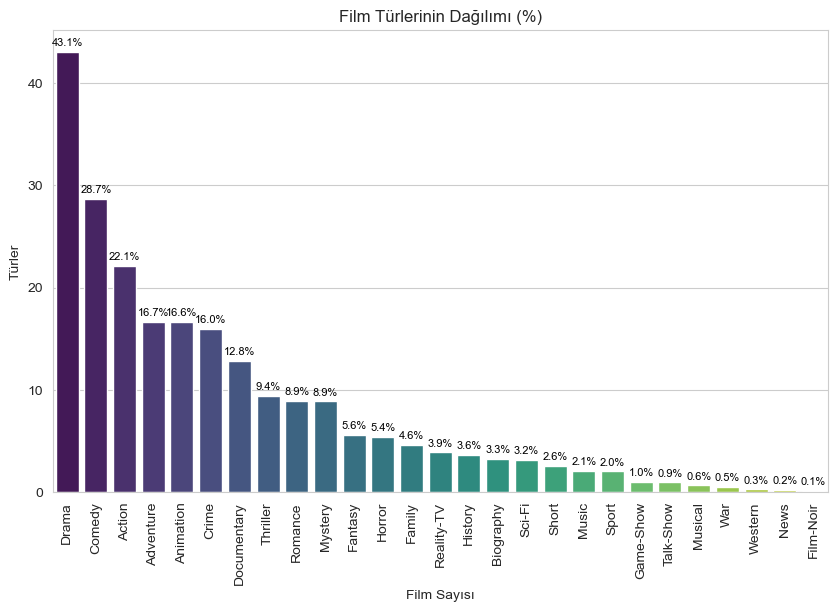

In [194]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=genre_ratio.index, y=genre_ratio.values, palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%1.1f%%', label_type='edge', fontsize=8, color='black', padding=3)
    
ax.set(xlabel='Film Sayısı', ylabel='Türler')
plt.title("Film Türlerinin Dağılımı (%)")
plt.xticks(rotation=90)
plt.show()

Film türlerinin dağılım grafiklerine bakıldığında **drama filmlerinin** veri setinin **%43**'ünü oluşturduğu görülmektedir.

## <font color='indianred'> <b>En Çok Yayınlanan 10 Türün Dağılımı</b><font color='black'> 

In [197]:
top10_genres = df['genre'].str.split(', ', expand=True).stack().value_counts()[:10]
top10_genres

Drama          4120
Comedy         2742
Action         2116
Adventure      1594
Animation      1593
Crime          1529
Documentary    1226
Thriller        903
Romance         850
Mystery         848
Name: count, dtype: int64

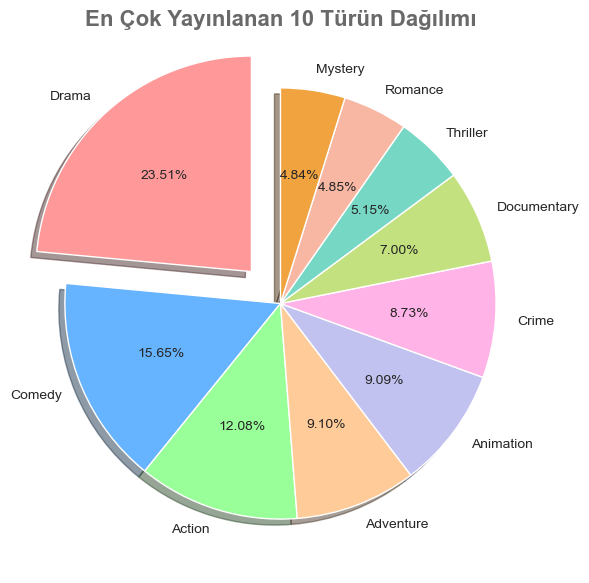

In [199]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(top10_genres.values, labels=top10_genres.index,
       autopct='%1.2f%%',
       startangle=90,
       shadow= 0.3,
       colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#76d7c4', '#f7b7a3', '#f1a340'],
       explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
      )

ax.set_title('En Çok Yayınlanan 10 Türün Dağılımı', fontsize=16, fontweight='bold', color= 'dimgrey')

plt.show()

## <font color='indianred'> <b>En Çok Film Yöneten 10 Yönetmen</b><font color='black'> 

In [201]:
# top 10 yönetmenleri bulma
director_counts = df['director'].str.split(', ', expand=True).stack().value_counts()[1:11]
director_counts

Adam Heydt         28
Shinji Aramaki     25
Kenji Kamiyama     24
Oliver Driver      21
Brian Smith        21
Giancarlo Volpe    19
Baran bo Odar      17
Manolo Caro        17
Jay Karas          17
Shih Ming Tay      17
Name: count, dtype: int64

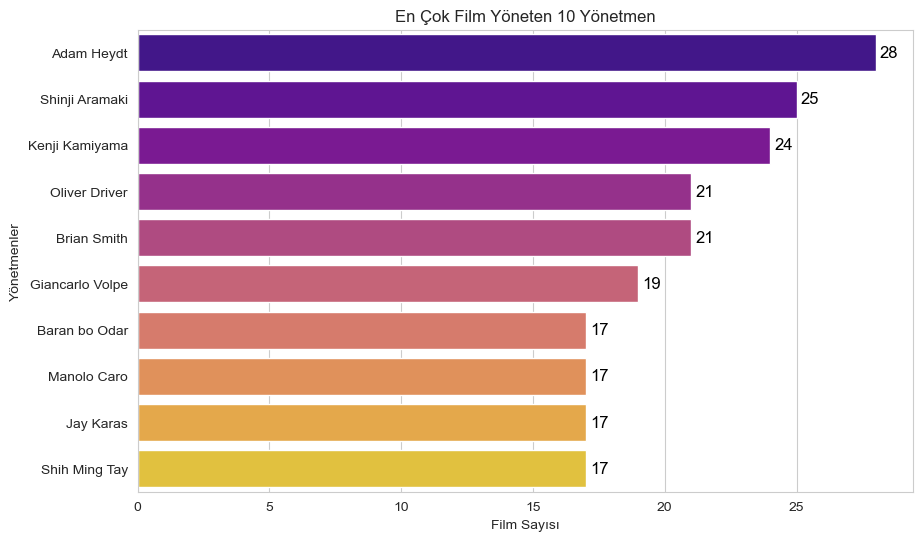

In [203]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=director_counts.values, y=director_counts.index, palette="plasma")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3)
    
ax.set(xlabel='Film Sayısı', ylabel='Yönetmenler')
plt.title("En Çok Film Yöneten 10 Yönetmen")
plt.show()

## <font color='indianred'> <b>En Çok Filmde Rol Alan 10 Oyuncu</b><font color='black'> 

In [205]:
actor_counts = df['director'].str.split(', ', expand=True).stack().value_counts()[1:11]
actor_counts

Adam Heydt         28
Shinji Aramaki     25
Kenji Kamiyama     24
Oliver Driver      21
Brian Smith        21
Giancarlo Volpe    19
Baran bo Odar      17
Manolo Caro        17
Jay Karas          17
Shih Ming Tay      17
Name: count, dtype: int64

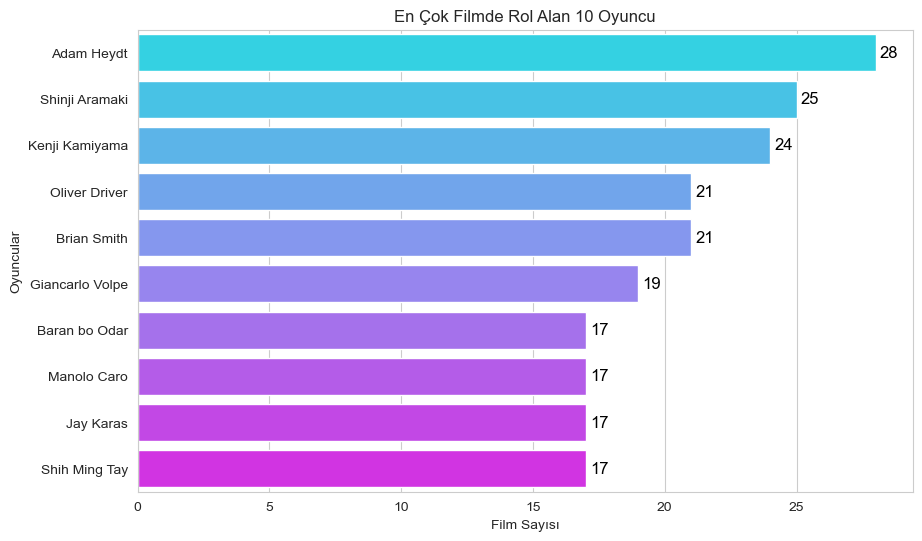

In [207]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=actor_counts.values, y=actor_counts.index, palette="cool")

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3)
    
ax.set(xlabel='Film Sayısı', ylabel='Oyuncular')
plt.title("En Çok Filmde Rol Alan 10 Oyuncu")
plt.show()

## <font color='indianred'> <b>Reyting ve Oy Sayısı Arasındaki İlişki</b><font color='black'> 

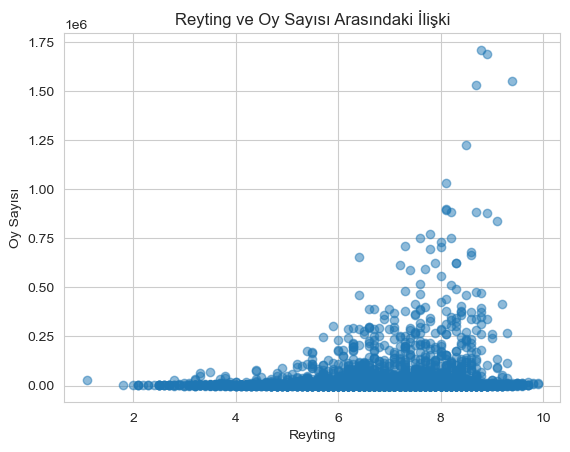

In [209]:
plt.scatter(df['rating'], df['votes'], alpha=0.5)
plt.title('Reyting ve Oy Sayısı Arasındaki İlişki')
plt.xlabel('Reyting')
plt.ylabel('Oy Sayısı')
plt.show()

Reyting ve Oy Sayısı Arasındaki İlişki:
 - Reytingi düşük (2-4 arası) filmlerin oy sayısı genellikle çok düşüktür.
 - Reyting 6'nın üzerine çıktıkça oy sayısında ciddi bir artış yaşanmaktadır.
 - En çok oyu alan filmler genellikle 8 - 10 civarında reyting alan filmlerdir.

Grafik, yüksek reytinglere sahip filmler (8-10) ve orta aralıktaki oy sayılarının (100.000-500.000 arası) yoğunlaşmasını göstermektedir. Bu genellikle daha popüler ve beğenilen filmlerin daha fazla oy alması anlamına gelmektedir.

**Bu grafik, popüler filmlerin genel olarak daha iyi reytinge sahip olduğunun ve bunun sonucunda da daha fazla kişi tarafından oylandığını göstermektedir.**

## <font color='indianred'> <b>Movies Veri Seti Korelasyonu</b><font color='black'> 

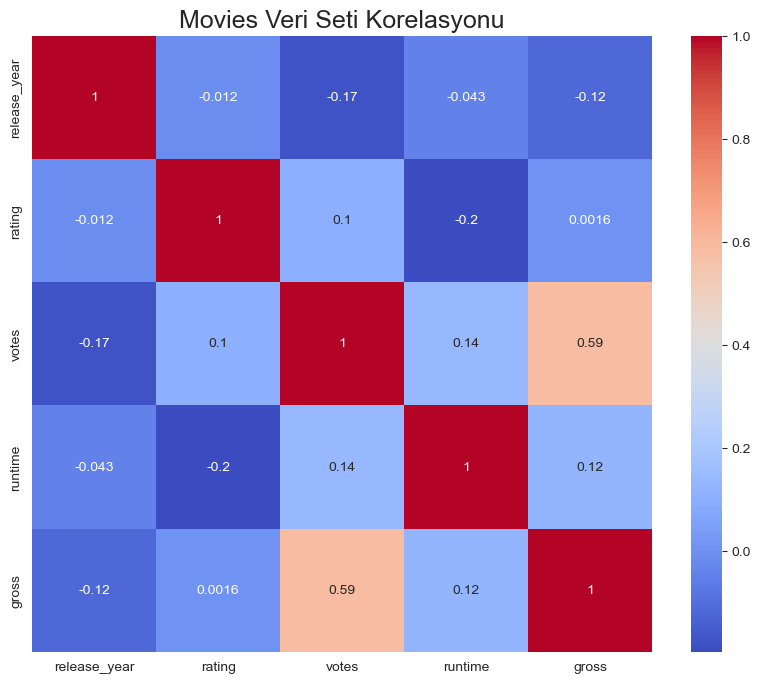

In [136]:
plt.figure(figsize=(10, 8))

numeric_df = df.select_dtypes(exclude="object")

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Movies Veri Seti Korelasyonu', fontsize=18)
plt.show()

Korelasyon matrisi, veri setindeki sayısal sütunlar arasındaki ilişkilerin analiz edilmesine olanak sağlamaktadır.

 - **Pozitif korelasyon (+1'e yakın):** İki değişken birlikte artmaktadır. (örn. bir değişken arttığında diğeri de artar)
 - **Negatif korelasyon (-1'e yakın)**: Bir değişken artarken diğeri azalmaktadır. (ters ilişki)
 - **Korelasyon yok (0 civarında**): İki değişken arasında anlamlı bir ilişki yoktur.

**votes ve gross sütunları arasında pozitif bir korelasyon vardır (0,59). Bu, daha fazla oy ve reyting sahip filmlerin genellikle daha fazla gelir elde ettiği anlamına gelir. Mantıksal olarak popüler filmler daha fazla reyting ve oy almakta ve bu da gelirlerinin artmasına katkıda bulunmaktadır.**

<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>TEŞEKKÜRLER!</b></p>